Processing File 0001/1194:	Round01-Hive01-2024_06_05-h01bee01.JPG

Threshold: 30
Black Pixel Percentage: 2.92%


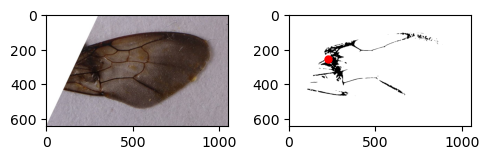

Processing File 0002/1194:	Round01-Hive01-2024_06_05-h01bee16.JPG

Threshold: 35
Black Pixel Percentage: 2.91%


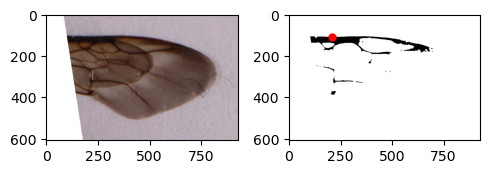

Processing File 0003/1194:	Round01-Hive01-2024_06_05-h01bee19.JPG

Threshold: 45
Black Pixel Percentage: 2.37%


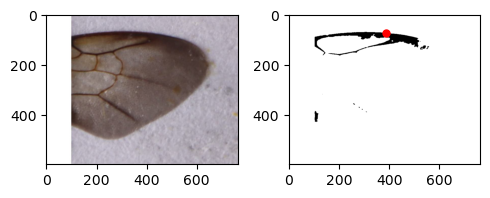

Processing File 0004/1194:	Round01-Hive01-2024_06_05-h01bee21.JPG

Threshold: 25
Black Pixel Percentage: 2.14%


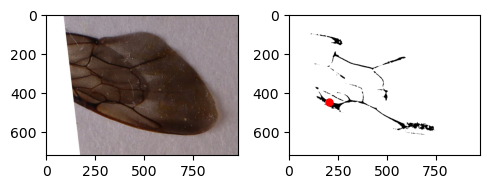

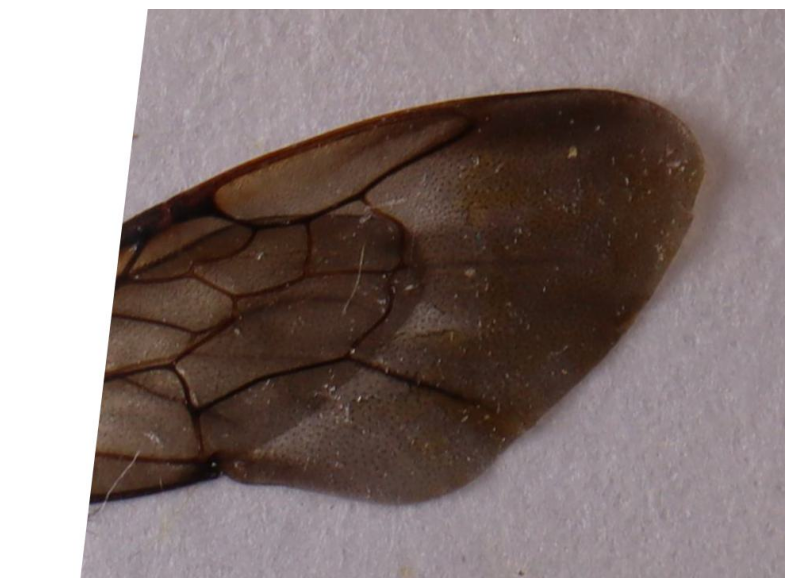

Processing File 0005/1194:	Round01-Hive01-2024_06_05-h01bee23.JPG

Threshold: 25
Black Pixel Percentage: 1.87%


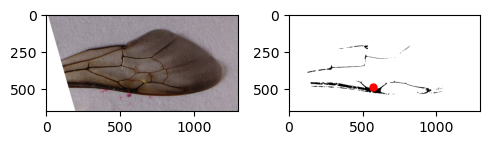

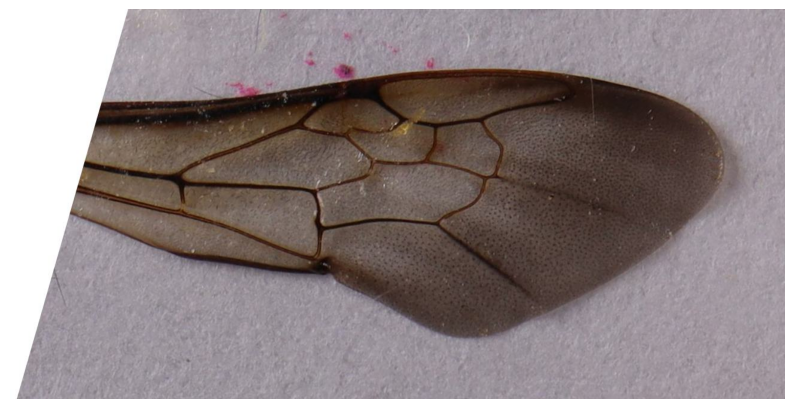

Processing File 0006/1194:	Round01-Hive01-2024_06_05-h01bee25.JPG

Threshold: 25
Black Pixel Percentage: 1.82%


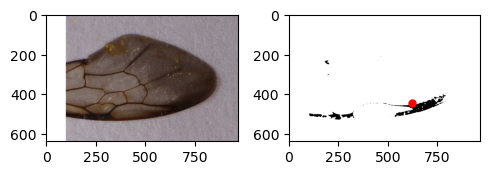

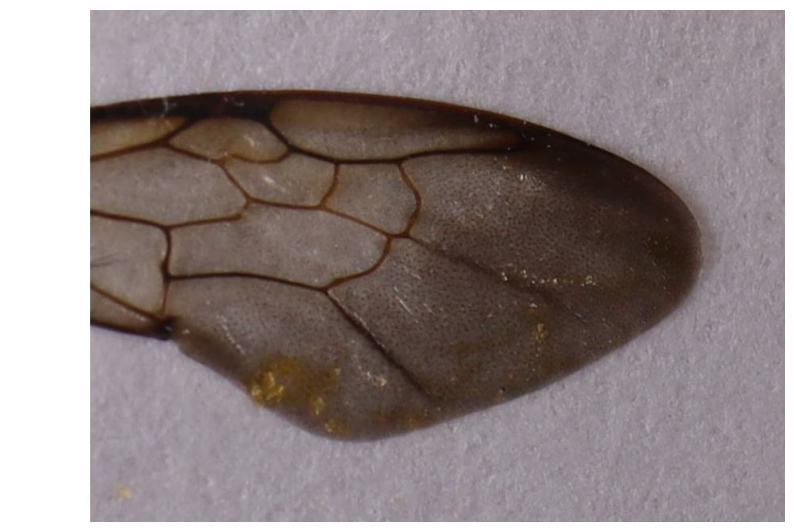

Processing File 0007/1194:	Round01-Hive01-2024_06_05-h01bee27.JPG

Threshold: 25
Black Pixel Percentage: 2.43%


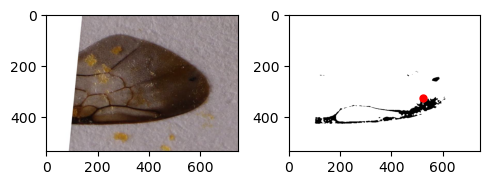

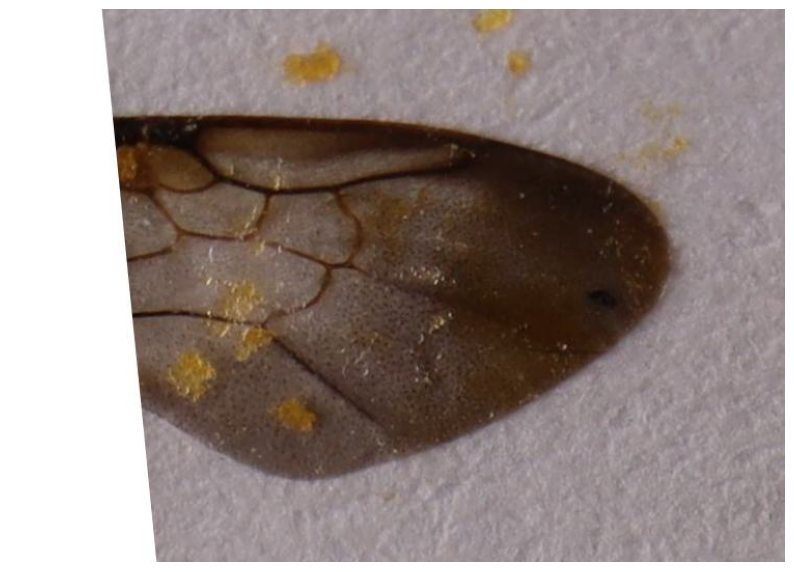

Processing File 0008/1194:	Round01-Hive01-2024_06_05-h01bee29.JPG

Threshold: 40
Black Pixel Percentage: 2.43%


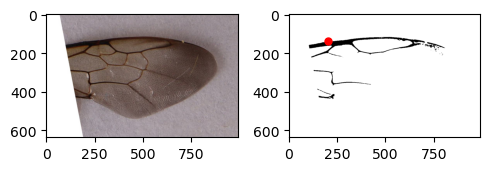

Processing File 0009/1194:	Round01-Hive01-2024_06_05-h01bee32.JPG

Threshold: 30
Black Pixel Percentage: 2.25%


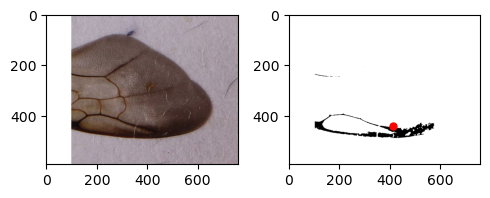

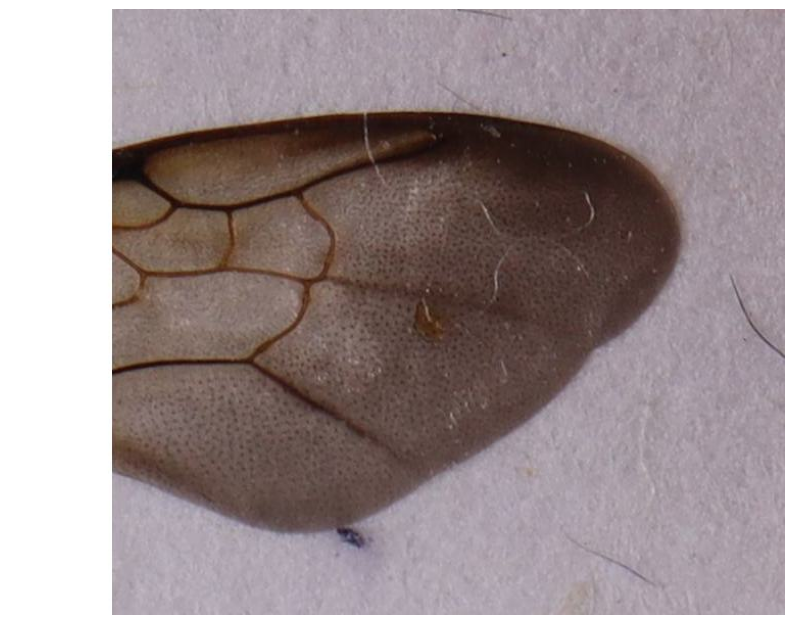

Processing File 0010/1194:	Round01-Hive01-2024_06_05-h01bee36.JPG

Threshold: 25
Black Pixel Percentage: 1.98%


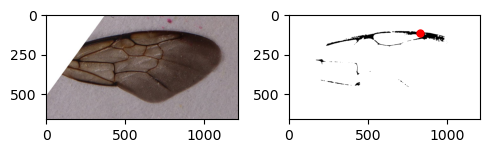

Processing File 0011/1194:	Round01-Hive01-2024_06_05-h01bee37.JPG

Threshold: 40
Black Pixel Percentage: 2.80%


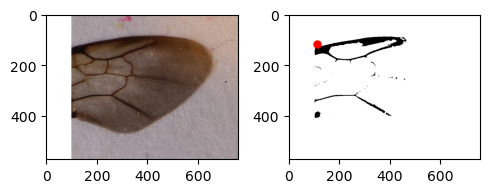

Processing File 0012/1194:	Round01-Hive01-2024_06_05-h01bee44.JPG

Threshold: 15
Black Pixel Percentage: 2.71%


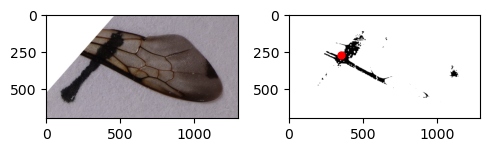

Processing File 0013/1194:	Round01-Hive01-2024_06_05-h01bee45.JPG

Threshold: 30
Black Pixel Percentage: 1.39%


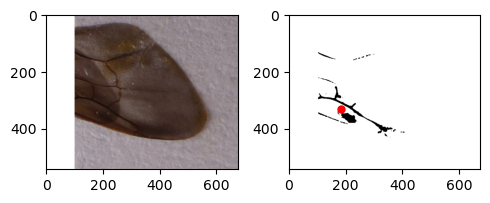

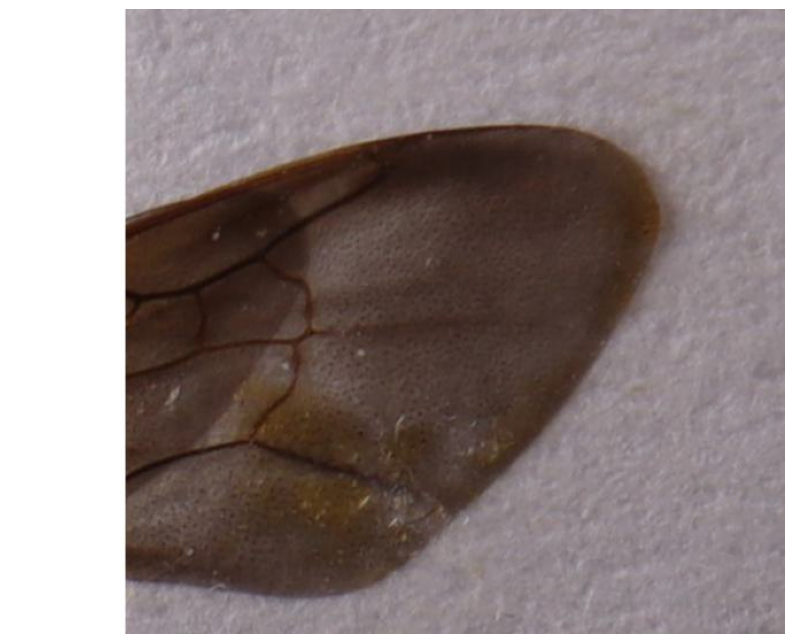

Processing File 0014/1194:	Round01-Hive01-2024_06_05-h01bee46.JPG

Threshold: 25
Black Pixel Percentage: 2.50%


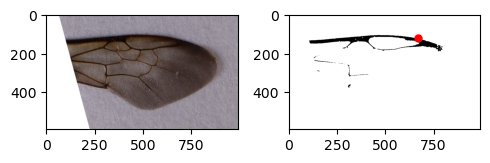

Processing File 0015/1194:	Round01-Hive01-2024_06_05-h01bee51.JPG

Threshold: 30
Black Pixel Percentage: 2.72%


KeyboardInterrupt: 

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import cv2
import os


def find_black_area(image, window_size):
    h, w = image.shape
    max_density = -1
    best_coords = (0, 0)

    # Slide the window over the image
    for y in range(0, h - window_size[1] + 1, 1):
        for x in range(0, w - window_size[0] + 1, 1):
            # Extract the window from the image
            window = image[y:y + window_size[1], x:x + window_size[0]]

            # Count the number of black pixels (assuming black pixels are 0)
            black_pixel_count = np.sum(window == 0)

            # Track the window with the maximum number of black pixels
            if black_pixel_count > max_density:
                max_density = black_pixel_count
                best_coords = (x, y)

    return best_coords


def flip_images(input_dir, output_dir):
    # Find all jpg files
    jpg_files = []
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".JPG") or file.endswith(".jpg"):
                jpg_files.append(os.path.join(root, file))

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Process every file
    total_files = len(jpg_files)
    digits = len(str(total_files))
    for idx, jpg_file_path in enumerate(jpg_files, 1):
        if idx > 100:
            continue
        jpg_basename = os.path.basename(jpg_file_path)
        output_file = output_dir + jpg_basename
        relative_jpg_path = jpg_file_path.removeprefix(input_dir)
        print(f"Processing File {idx:0{digits}}/{total_files}:\t{relative_jpg_path}")
        
        # Load image
        image = cv2.imread(jpg_file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Grayscale image
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply Gaussian Blur
        blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)

        # Find a threshold with less than 3% black area
        threshold = 60
        while threshold >= 5:
            # Apply thresholding to get a binary image 
            _, thresh = cv2.threshold(blurred_image, threshold, 255, cv2.THRESH_BINARY)
            
            # Calculate the percentage of black pixels
            total_pixels = thresh.size
            black_pixels = np.count_nonzero(thresh == 0)
            black_percentage = (black_pixels / total_pixels) * 100

            # Use this threshold if less than 3% of pixels are black
            if black_percentage < 3:
                break
                
            # Decrease threshold until less than 3% of pixels are black
            threshold -= 5

        print(f"\nThreshold: {threshold}")
        print(f"Black Pixel Percentage: {black_percentage:.2f}%")
        
        window_size = (50, 50)
        cords = find_black_area(thresh, window_size)
        
        # Create a 1x2 figure
        fig, axes = plt.subplots(1, 2, figsize=(5, 10))
        # Image 1
        axes[0].imshow(image)
        axes[0].axis("on")
        # Image 2
        axes[1].imshow(thresh, cmap="gray")
        axes[1].scatter(cords[0], cords[1], c="red", s=100, marker=".")
        axes[1].axis("on")
        # Show the figure
        plt.tight_layout()
        plt.show()

        if cords[1] > image.shape[0]/2:
            flipped_image = cv2.flip(image, 0)
            
            plt.figure(figsize=(10, 10))
            plt.imshow(flipped_image)
            plt.axis("off")
            plt.show()

            

input_dir = "/mnt/c/Projects/Master/Data/Processed/2-LiveWingCrops/Wings/"
output_dir = "/mnt/c/Projects/Master/Data/Processed/3-LiveWingCropsImproved/"

flip_images(input_dir, output_dir)